In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [19]:
data = pd.read_csv('data_1.csv')
grade=pd.read_csv('grade.csv')
loan=pd.read_csv('loan_det.csv')

In [20]:
# data.head()
cols=['emp_length','annual_inc','loan_status','dti','inq_last_6mths','open_acc','pub_rec','revol_util','total_acc','total_pymnt','grade','loan_amnt','term','installment']

In [21]:
# loan.head()

In [22]:
data = pd.concat([data, grade], axis=1)
data = pd.concat([data,loan],axis=1)
data = data.loc[:, ~data.columns.duplicated(keep='first')]
data=data[cols]


In [23]:
data.describe()

,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_pymnt,loan_amnt,installment
count,8.873750e+05,887379.000000,887350.000000,887350.000000,887350.000000,886877.000000,887350.000000,887379.000000,887379.000000,887379.000000
mean,7.502759e+04,18.157039,0.694623,11.548469,0.195307,55.067693,25.268026,7558.826684,14755.264605,436.717127
std,6.469830e+04,17.190626,0.998448,5.317313,0.582091,23.834344,11.840561,7871.243336,8435.455601,244.186593
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,500.000000,15.670000
25%,4.500000e+04,11.910000,0.000000,8.000000,0.000000,37.700000,17.000000,1914.590000,8000.000000,260.705000
50%,6.500000e+04,17.650000,0.000000,11.000000,0.000000,56.000000,24.000000,4894.999117,13000.000000,382.550000
75%,9.000000e+04,23.950000,1.000000,14.000000,0.000000,73.600000,32.000000,10616.814230,20000.000000,572.600000
max,9.500000e+06,9999.000000,33.000000,90.000000,86.000000,892.300000,169.000000,57777.579870,35000.000000,1445.460000


In [24]:
# merged_X=data.filter(regex=r'^(?!Unnamed).*$')
# merged_X.head()
data=data.dropna()
data.head()

,emp_length,annual_inc,loan_status,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_pymnt,grade,loan_amnt,term,installment
0,10+ years,24000.0,Fully Paid,27.65,1.0,3.0,0.0,83.7,9.0,5861.071414,B,5000,36 months,162.87
1,< 1 year,30000.0,Charged Off,1.00,5.0,3.0,0.0,9.4,4.0,1008.710000,C,2500,60 months,59.83
2,10+ years,12252.0,Fully Paid,8.72,2.0,2.0,0.0,98.5,10.0,3003.653644,C,2400,36 months,84.33
3,10+ years,49200.0,Fully Paid,20.00,1.0,10.0,0.0,21.0,37.0,12226.302210,C,10000,36 months,339.31
4,1 year,80000.0,Current,17.94,0.0,15.0,0.0,53.9,38.0,3242.170000,B,3000,60 months,67.79


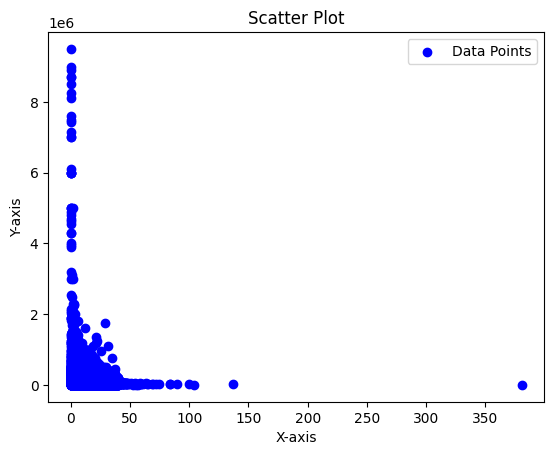

In [25]:
import matplotlib.pyplot as plt
y=data['annual_inc']
x=data['dti']
plt.scatter(x, y, color='blue', marker='o', label='Data Points')

# Add title and labels
plt.title('Scatter Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Add legend
plt.legend()

# Show the plot
plt.show()

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


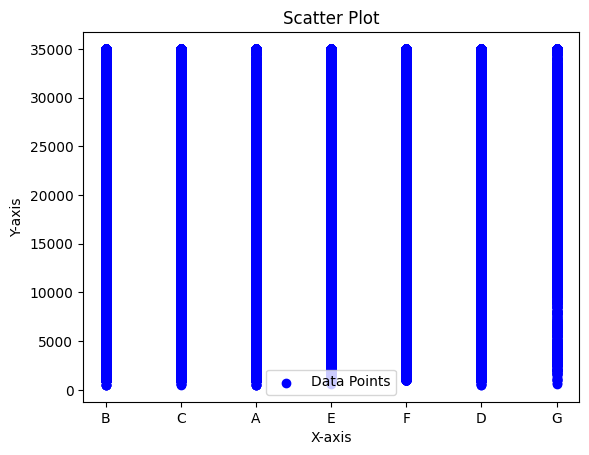

In [26]:
import matplotlib.pyplot as plt
x=data['grade']
y=data['loan_amnt']
plt.scatter(x, y, color='blue', marker='o', label='Data Points')

# Add title and labels
plt.title('Scatter Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [27]:
merged_X=data.drop(['loan_status'],axis=1)
# merged_X.head()
Y=data[['loan_status']]
merged_X.head()

,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_pymnt,grade,loan_amnt,term,installment
0,10+ years,24000.0,27.65,1.0,3.0,0.0,83.7,9.0,5861.071414,B,5000,36 months,162.87
1,< 1 year,30000.0,1.00,5.0,3.0,0.0,9.4,4.0,1008.710000,C,2500,60 months,59.83
2,10+ years,12252.0,8.72,2.0,2.0,0.0,98.5,10.0,3003.653644,C,2400,36 months,84.33
3,10+ years,49200.0,20.00,1.0,10.0,0.0,21.0,37.0,12226.302210,C,10000,36 months,339.31
4,1 year,80000.0,17.94,0.0,15.0,0.0,53.9,38.0,3242.170000,B,3000,60 months,67.79


In [28]:
# merged_X.describe()

In [29]:
Y.describe()

,loan_status
count,842067
unique,10
top,Current
freq,568447


In [30]:
unique_values = pd.unique(Y['loan_status'])
unique_values

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

Fully Paid: 90-100% - Borrowers who have fully paid off their loans are considered low risk, so they should be approved for a loan with a high probability.
Charged Off: 0-10% - Charged off loans represent a high risk, so borrowers with this status should be denied a loan with a very high probability.
Current: 80-100% - Current borrowers are meeting their obligations, so they can be considered for a loan with a high probability.
Default: 0-5% - Defaulted loans represent a very high risk, so borrowers with this status should be denied a loan with a very high probability.
Late (31-120 days): 40-70% - Borrowers in this category are late on payments but may still catch up. They represent an increased risk, so they should be considered for a loan with caution.
In Grace Period: 60-80% - Borrowers in the grace period have missed a payment but may catch up. They could be considered for a loan with a moderate probability.
Late (16-30 days): 50-75% - Borrowers in this category are in the early stages of delinquency. They represent an increased risk but may still be considered for a loan.
Does not meet the credit policy. Status:Fully Paid: 70-90% - Borrowers who fully paid but did not meet the credit policy may have some additional risk factors. They should be considered for a loan, but the probability may be lower than for borrowers who fully met the credit policy.
Does not meet the credit policy. Status:Charged Off: 0-10% - Borrowers who did not meet the credit policy and ended up charged off represent a high risk. They should be denied a loan with a very high probability.
Issued: 70-90% - Borrowers with issued loans may still have uncertainty regarding repayment but could be considered for a loan.

In [31]:
from sklearn.preprocessing import LabelEncoder

# Assuming Y is your DataFrame containing the loan status column
# List of loan status categories
loan_status_categories = ['Fully Paid', 'Charged Off', 'Current', 'Default',
                          'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
                          'Does not meet the credit policy. Status:Fully Paid',
                          'Does not meet the credit policy. Status:Charged Off', 'Issued']

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the loan status column in Y to label encode it
Y['loan_status_encoded'] = label_encoder.fit_transform(Y['loan_status'])
# print("Mapping of categories to encoded numbers:")
encoding_mapping = {category: code for category, code in zip(loan_status_categories, label_encoder.transform(loan_status_categories))}

encoding_mapping


C:\Users\HP\AppData\Local\Temp\ipykernel_50848\1584429750.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['loan_status_encoded'] = label_encoder.fit_transform(Y['loan_status'])


{'Fully Paid': 5,
 'Charged Off': 0,
 'Current': 1,
 'Default': 2,
 'Late (31-120 days)': 9,
 'In Grace Period': 6,
 'Late (16-30 days)': 8,
 'Does not meet the credit policy. Status:Fully Paid': 4,
 'Does not meet the credit policy. Status:Charged Off': 3,
 'Issued': 7}

In [32]:
Y.head()

,loan_status,loan_status_encoded
0,Fully Paid,5
1,Charged Off,0
2,Fully Paid,5
3,Fully Paid,5
4,Current,1


In [33]:
# merged_X['term']

In [34]:
import re
# Extract numerical years from 'emp_length' using regex
merged_X['emp_length_years'] = merged_X['emp_length'].apply(lambda x: re.findall(r'\d+', str(x))[0] if pd.notnull(x) else np.nan)

# Convert 'emp_length_years' to numeric
merged_X['emp_length_years'] = pd.to_numeric(merged_X['emp_length_years'], errors='coerce')
merged_X['grade_encoded'] = label_encoder.fit_transform(merged_X['grade'])
merged_X['term_months'] = merged_X['term'].apply(lambda x: int(re.findall(r'\d+', x)[0]))

In [35]:
merged_X.head()

,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_pymnt,grade,loan_amnt,term,installment,emp_length_years,grade_encoded,term_months
0,10+ years,24000.0,27.65,1.0,3.0,0.0,83.7,9.0,5861.071414,B,5000,36 months,162.87,10,1,36
1,< 1 year,30000.0,1.00,5.0,3.0,0.0,9.4,4.0,1008.710000,C,2500,60 months,59.83,1,2,60
2,10+ years,12252.0,8.72,2.0,2.0,0.0,98.5,10.0,3003.653644,C,2400,36 months,84.33,10,2,36
3,10+ years,49200.0,20.00,1.0,10.0,0.0,21.0,37.0,12226.302210,C,10000,36 months,339.31,10,2,36
4,1 year,80000.0,17.94,0.0,15.0,0.0,53.9,38.0,3242.170000,B,3000,60 months,67.79,1,1,60


In [36]:
X_Final_cols=['annual_inc','dti','inq_last_6mths','open_acc','total_acc','revol_util','total_pymnt','grade_encoded','loan_amnt','term_months','emp_length_years','installment']
X_Final=merged_X[X_Final_cols]
X_Final.head()

,annual_inc,dti,inq_last_6mths,open_acc,total_acc,revol_util,total_pymnt,grade_encoded,loan_amnt,term_months,emp_length_years,installment
0,24000.0,27.65,1.0,3.0,9.0,83.7,5861.071414,1,5000,36,10,162.87
1,30000.0,1.00,5.0,3.0,4.0,9.4,1008.710000,2,2500,60,1,59.83
2,12252.0,8.72,2.0,2.0,10.0,98.5,3003.653644,2,2400,36,10,84.33
3,49200.0,20.00,1.0,10.0,37.0,21.0,12226.302210,2,10000,36,10,339.31
4,80000.0,17.94,0.0,15.0,38.0,53.9,3242.170000,1,3000,60,1,67.79


In [37]:
# Y_Final=

In [38]:
Y_Final=Y['loan_status_encoded']
Y_Final.head()

0    5
1    0
2    5
3    5
4    1
Name: loan_status_encoded, dtype: int32

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Assume X contains your features and y contains your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_Final, Y_Final, test_size=0.2, random_state=42)

# Drop rows with missing values from the training data
# y_train = y_train[X_train.index]  # Make sure to adjust y_train accordingly

# # Initialize and fit the RandomForestClassifier
# rf_classifier = RandomForestClassifier()
# rf_classifier.fit(X_train, y_train)

# # Evaluate the model on the test data
# accuracy = rf_classifier.score(X_test, y_test)
# print("Accuracy:", accuracy)

In [52]:
X_train.head()

,annual_inc,dti,inq_last_6mths,open_acc,total_acc,revol_util,total_pymnt,grade_encoded,loan_amnt,term_months,emp_length_years,installment
240180,78000.0,22.69,0.0,12.0,15.0,82.0,7377.60,1,27600,60,7,568.53
770238,51000.0,13.81,2.0,7.0,30.0,37.6,9601.81,5,8975,36,10,352.07
845834,95000.0,19.02,1.0,8.0,16.0,50.4,2479.85,3,6250,36,7,223.27
64475,47500.0,32.43,6.0,10.0,22.0,73.9,8712.80,4,19000,60,2,521.53
440614,45000.0,23.49,0.0,10.0,27.0,66.2,13308.03,1,12000,36,10,398.52


In [53]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier()

# Train the classifier
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8882990725236619


In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.datasets import make_classification

# Calculate precision, recall, F1 score
y_proba = model.predict_proba(X_test)

# Predictions (multiclass)
y_pred = model.predict(X_test)

# Calculate precision, recall, F1 score (macro average)
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Precision:", precision)


Precision: 0.7366598755509935


In [55]:
print("Recall:", recall)


Recall: 0.31672485256183747


In [56]:
print("F1 Score:", f1)

F1 Score: 0.4354321023034454


In [49]:
print(conf_matrix)

[[   220   7811      0     16      1    323      0     15      0      0]
 [    65 109066      0      4      8   4196      0    634      0      1]
 [     0    232      0      0      0      7      0      0      0      0]
 [     4     56      0     46      9     11      0      0      0      0]
 [     0      2      0      4    186    234      0      0      0      0]
 [     7    368      0      0     47  39491      0      1      0      0]
 [     2   1090      0      1      0     97      0     18      0      0]
 [     0    916      0      0      0      0      0    593      0      0]
 [     1    457      0      0      0     19      0      3      0      0]
 [     3   2044      0      0      0    101      0      4      0      0]]


In [50]:
y_proba

array([[9.0386227e-02, 8.6103982e-01, 8.7377540e-04, ..., 2.8911923e-06,
        3.9709359e-03, 2.2112159e-02],
       [1.3149285e-02, 9.1797513e-01, 1.5731076e-03, ..., 4.2527604e-06,
        1.2182831e-02, 2.6297994e-02],
       [3.9878104e-02, 9.3448275e-01, 9.3723385e-04, ..., 1.8488504e-06,
        4.5358120e-03, 1.1723700e-02],
       ...,
       [1.8004505e-03, 2.6141558e-02, 5.7371788e-05, ..., 5.0694489e-05,
        9.6107527e-05, 6.7082542e-04],
       [1.1913683e-02, 9.7025776e-01, 3.7179430e-04, ..., 2.7195709e-05,
        1.6178751e-03, 1.1169600e-02],
       [1.6562837e-03, 2.7846679e-02, 4.0710609e-05, ..., 2.6196492e-06,
        1.3883601e-04, 7.8614446e-04]], dtype=float32)

In [ ]:
# array_pred=[
#     'emp_length',
#     'annual_inc',
#     'dti',
#     'inq_last_6mths',
#     'open_acc',
#     'pub_rec',
#     'revol_util',
#     'total_acc',
#     'total_pymnt',
#     'grade',
#     'loan_amnt',
#     'term',
#     'installment'
# ]
# annual_inc	dti	inq_last_6mths	open_acc	total_acc	revol_util	total_pymnt	grade_encoded	loan_amnt	term_months	emp_length_years	installment
# 'annual_inc','dti','inq_last_6mths','open_acc','total_acc','revol_util','total_pymnt','grade_encoded','loan_amnt','term_months','emp_length_years','installment'
# array_pred1=[250,7,5,6,8,0,0,2,25000000000000,24,0,125000]
# y_pred = model.predict([array_pred1])
# y_pred
# encoding_mapping
# predicted_classes = [encoding_mapping[y_pred] for y_pred in label]

# Display the result
# print(predicted_classes)


array([0], dtype=int64)

In [ ]:
import pickle
with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
encoding_mapping

{'Fully Paid': 5,
 'Charged Off': 0,
 'Current': 1,
 'Default': 2,
 'Late (31-120 days)': 9,
 'In Grace Period': 6,
 'Late (16-30 days)': 8,
 'Does not meet the credit policy. Status:Fully Paid': 4,
 'Does not meet the credit policy. Status:Charged Off': 3,
 'Issued': 7}

Neural Network Model.

In [57]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=12))  # 12 input features, 32 neurons in the first hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron and sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)





Epoch 1/10


21052/21052 [==============================] - 40s 2ms/step - loss: -8999.3604 - accuracy: 0.6737
Epoch 2/10
21052/21052 [==============================] - 35s 2ms/step - loss: -55597.2617 - accuracy: 0.6746
Epoch 3/10
21052/21052 [==============================] - 50s 2ms/step - loss: -149394.5000 - accuracy: 0.6746
Epoch 4/10
21052/21052 [==============================] - 56s 3ms/step - loss: -293628.8750 - accuracy: 0.6746
Epoch 5/10
21052/21052 [==============================] - 39s 2ms/step - loss: -488335.0000 - accuracy: 0.6746
Epoch 6/10
21052/21052 [==============================] - 40s 2ms/step - loss: -733190.9375 - accuracy: 0.6746
Epoch 7/10
21052/21052 [==============================] - 37s 2ms/step - loss: -1028235.2500 - accuracy: 0.6746
Epoch 8/10
21052/21052 [==============================] - 37s 2ms/step - loss: -1373523.6250 - accuracy: 0.6746
Epoch 9/10
21052/21052 [==============================] - 39s 2ms/step - loss: -1769398.3750 - accuracy: 0.6

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize logistic regression model
logistic_regression_model = LogisticRegression(max_iter=1000)

# Train the model
logistic_regression_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logistic_regression_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.879386511810182


In [61]:
# Calculate precision
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)

# Calculate recall
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

print("Precision:", precision)


Precision: 0.7548464882204946


In [62]:
print("Recall:", recall)

Recall: 0.25083594657101677


Overall, these metrics indicate that while the model has relatively high precision, it sacrifices recall, resulting in a low F1 score. This suggests that the model may be biased towards predicting the majority class (resulting in high precision but low recall), or it may be making predictions that are too conservative. Further analysis and potentially model adjustments are needed to improve the model's performance.

In [63]:

print("F1 Score:", f1)

F1 Score: 0.27035473549796185


NAIVE BAYES

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB()

# Train the model
naive_bayes_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = naive_bayes_model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7451102639923046

In [67]:
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)
precision

0.42695551271446525